# PRELIMINARIES 

### STEP 1: run each of these in a separate terminal
#### TERMINAL 1:
export SERVER='carta-cav'

ssh -L 8081:localhost:8081 "$SERVER"

#### TERMINAL 2:
export SERVER='carta-cav'

ssh -L 26025:localhost:26025 "$SERVER"

### STEP 2: update the following two lines at the top of
#### multimodal_class.py

to be the appropriate paths on your system

path_to_VRPsolver = '/Users/dan/Documents/transit_webapp/'

path_to_multimodalsim = '/Users/dan/Documents/multimodal/'


### IMPORTS

In [11]:
%load_ext autoreload
%autoreload 2
from multimodal_class import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### INITIAL PARAMETERS

In [19]:
params = {'csv_file_path': 'INPUTS/PRE_micro_0.csv', 
          'modes':['drive','walk','gtfs','ondemand'],
          'time_window': [21600,36000], # in seconds. 6 AM to 10 AM
          'bnds':[np.array([-85.3394,  34.9458]), # bottom left
                  np.array([-85.2494,  35.0658])], # top right
          'groups_regions_geojson': 'INPUTS/regions3.geojson', 
          'num_drivers_per_group':{'group0':4,'group1':4,'group2':4},
          'monetary_costs':{'ondemand':0,'gtfs':1.5},
          'background_congestion_file': 'INPUTS/background_traffic1.obj',  # OPTIONAL - LOADS BACKGROUND TRAFFIC
          ############ PRECOMPUTED GTFS DATA ###########
          'load_ondemand_fits': 'INPUTS/load_file.pickle', 
          'save_ondemand_fits': 'INPUTS/save_file.pickle',
          'gtfs_feed_file': 'INPUTS/carta_gtfs.zip', 
          'gtfs_precomputed_file': 'INPUTS/gtfs_trips.obj'}

# SETUP SIMULATION

In [20]:
# OPTION-1: FULL ONE-SHOT SETUP 
# BLAH = WORLD(params,full_setup = True)
# OPTION-2: STEP-BY-STEP SETUP
WORLD1 = WORLD(params)
WORLD1.initGRAPHSnFEEDS();
WORLD1.initNETWORKS();
WORLD1.initCONVERTER();
WORLD1.initSTATS()
WORLD1.initONDEMAND();
WORLD1.initPEOPLE();
WORLD1.initBACKGROUND();


monetary cost of drive segment: 0 $
monetary cost of walk segment: 0 $
monetary cost of gtfs segment: 1.5 $
monetary cost of ondemand segment: 0 $
loading graph/feed for drive mode...
loading graph/feed for walk mode...
loading graph/feed for gtfs mode...
connecting close bus stops...
Original num of edges:  2113
Final num of edges:  3849
loading graph/feed for ondemand mode...
cutting graphs to boundaries...
composing graphs...
computing reverse graphs...
...reversing drive graph...
...reversing walk graph...
...reversing gtfs graph...
...reversing ondemand graph...
...reversing all graph...
constructing NETWORK  drive mode...
constructing NETWORK  walk mode...
constructing NETWORK  gtfs mode...
constructing NETWORK  ondemand mode...
adding 7 to group0 ...
adding 7 to group1 ...
LOADING POPULATION DATA:
Using the default year of 2021
Using FIPS code '47' for input 'TN'
Using FIPS code '065' for input 'Hamilton'
time to setup origins & dests:  0.3054370880126953
Done setting up on-dema

### PLOT ODS & REGIONS

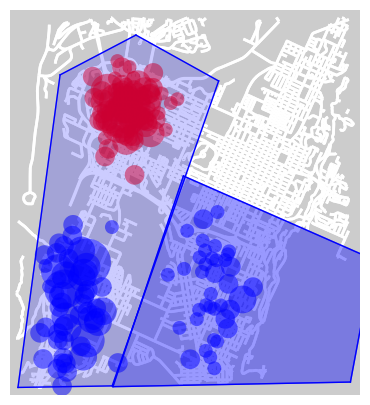

In [21]:
from multimodal_class import *
WORLD1.plotPRELIMINARIES(include_demand_curves=False,save_file='save_file.pickle')

### FIT CONGESTION DEMAND MODELS

In [22]:
from multimodal_class import *
WORLD1.load_fits = False;
# counts = {'num_counts':8,'num_per_count':1}
counts = {'num_counts':2,'num_per_count':1}
WORLD1.fitModels(counts=counts);

load fits not specified...
generating fits...
updating individual choices...
person218 ...
DEMAND CURVE - generate (takes 10 MIN...)
...runs VRP solver (num_pts*num_per_count) times...
### ~ approx. 1 run/15 seconds...
starting on-demand curve computations for a total of 257 trips...
starting on-demand curve computation for group NUMBER  0
...for a total number of trips of 219
counts to compute:  [21, 196]
...computing averages for 21 active ondemand trips in group0 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:37:02,444: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:37:02,903: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:37:03,354: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:37:03,355: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:37:03,356: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:37:03,357: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:37:03,358: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:37:03,358: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:37:03,359: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  1866.1818181818182
...computing averages for 196 active ondemand trips in group0 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:37:52,084: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:37:58,847: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:38:05,513: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:38:05,514: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:38:05,514: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:38:05,514: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:38:05,514: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:38:05,515: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:38:05,515: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2409.935779816514
starting on-demand curve computation for group NUMBER  1
...for a total number of trips of 38
counts to compute:  [3, 33]
...computing averages for 3 active ondemand trips in group1 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:41:19,991: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:41:20,234: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:41:20,468: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:41:20,469: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:41:20,470: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:41:20,470: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:41:20,471: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:41:20,471: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:41:20,472: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  1391.0
...computing averages for 33 active ondemand trips in group1 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:41:39,631: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:41:40,309: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:41:41,006: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:41:41,007: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:41:41,007: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:41:41,007: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:41:41,009: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:41:41,010: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:41:41,011: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2556.1176470588234


### PRELIMINARY DEMAND CURVES (OPTIONAL)

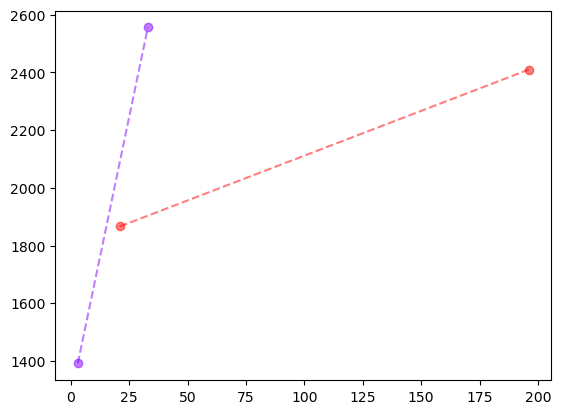

In [23]:
colors = {'group0':[1,0,0,0.5],'group1':[0.5,0,1,0.5],'group2':[0,0,1,0.5],'group3':[1,0.5,0.,0.5]};
WORLD1.ONDEMAND.plotCongestionModels(colors=colors,save_file=save_outputs_folder+'/figs/demand_curves.pdf')

### SAVE CONGESTION DEMAND MODELS (OPTIONAL)

In [24]:
WORLD1.save_fits = True; #se; # must be set to True
WORLD1.save_fits_file = save_fits_file; 
WORLD1.saveFits();

# RUN SIMULATION

In [ ]:
from multimodal_class import *
WORLD1.SIM(num_iters = num_iters, restart = True); 

------------ Planning initial trips... ------------
person218 ...
------------------ITERATION 0 -----------
starting gtfs computations...
...with  170  active trips...
REMOVING MASS FROM GTFS TRIPS...
starting driving computations...
...with  0  active trips...
starting on-demand computations...
COMPUTING ondemand trips for  group0
...with 219 active ondemand trips...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:42:59,819: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:43:06,981: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:43:14,454: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:43:14,454: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:43:14,454: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:43:14,455: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:43:14,455: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:43:14,455: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:43:14,456: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  1989.274336283186
...expected num of trips given cost: 10.000000000000032
...actual num trips: 219
...adjusting cost estimate by 2089.9999999999995
...changing cost est from 1832.0029977362094 to 3922.002997736209
COMPUTING ondemand trips for  group1
...with 38 active ondemand trips...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-30 15:46:17,909: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-30 15:46:18,763: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-30 15:46:19,538: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-30 15:46:19,539: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-30 15:46:19,539: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-30 15:46:19,540: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-30 15:46:19,540: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-30 15:46:19,541: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-30 15:46:19,542: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2220.051282051282
...expected num of trips given cost: 10.000000000000004
...actual num trips: 38
...adjusting cost estimate by 279.99999999999994
...changing cost est from 1662.8607843137256 to 1942.8607843137256
starting walking computations...
...with  188  active trips...
>>> segment 0 ...


In [ ]:
WORLD1.initUNCONGESTED()

### GENERATE OUTPUTS

In [ ]:
from multimodal_class import *
WORLD1.generateOutputs(); #randomize=['money','switches']);

### PRINT OUTPUTS

In [ ]:
mode = 'ondemand'
dfs_to_show = [mode]
WORLD1.printOutputs(show_active=True,dfs_to_show = dfs_to_show,row_count = 100); 

### SAVE OUTPUTS

In [ ]:
WORLD1.saveOutputs(save_outputs_folder,typ='pickle',overwrite=True)

### GENERATE DASHBOARD

In [ ]:
from multimodal_class import *
WORLD1.generateLayers();
WORLD1.plotLAYERS(folder = dashboard_folder,overwrite = True,verbose=False)

### SHOW DASHBOARD

In [ ]:
from multimodal_class import *
WORLD1.DASH = DASHBOARD(WORLD1.dash_folder);
WORLD1.DASH.makeGrid();
WORLD1.DASH.addOutputs(WORLD1.OUTPUTS,use_active=True,filter_for_zeros=True)
WORLD1.DASH.addImages(WORLD1.layers)

In [ ]:
WORLD1.DASH.show()

### CREATE HTML DASHBOARD

In [ ]:
import plotly.io as pio
pio.write_html(WORLD1.DASH.fig, file=dashboard_folder+'/dash.html', auto_open=True)

####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 
####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 
####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 
####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 

In [ ]:
# group = 'group0'
# RUNS = WORLD1.ONDEMAND.groups[group].runs
# for run in RUNS:
#     RUN = RUNS[run];
#     print(vars(RUN))
print(WORLD1.OUTPUTS['ondemand'])

In [ ]:
NETWORK.current_edge_costs

In [ ]:
mode = 'walk'
NETWORK = WORLD1.NETWORKS[mode]
NETWORK.initial_costs_computed = False
# GRAPH = WORLD1.GRAPHS[mode]
yy = NETWORK.createEdgeCosts(GRAPH)
yy = [yy[tag][0] for tag in yy]
print(yy)

In [ ]:
mode = 'node'
GRAPH = WORLD1.GRAPHS[mode]
EDGES = GRAPH.edges;
yy = [EDGES[edge]['c'] for edge in EDGES]
plt.plot(yy)

In [ ]:
modes = ['walk','gtfs','ondemand']
colors = [[1,1,0],[1,0.5,0],[0,0,1]];
factor = 'time'

for i,mode in enumerate(modes):
    NETWORK = WORLD1.NETWORKS[mode];
    SEGS = NETWORK.segs
    yy = []
    for seg in SEGS:
        cost = SEGS[seg].costs['current_'+factor];
        if cost < 100000:
            yy.append(cost)

    if True: #mode == 'ondemand':
        yy = np.sort(yy)
    plt.plot(yy,color=colors[i])